# python (général - suite)

## map

On a vu que la fonction exp (par exemple) de numpy pouvait s'appliquer à un tableau numpy, mais pas à une liste ou à un tuple.
On ne peut pas appliquer directement la fonction exp du module math, ni à un tableau, ni à une liste, ni à un tuple.

In [4]:
import numpy as np
import math
tn = np.array([1, 2, 4])
l = [1, 2, 4]
t = (1, 2, 4)
f1 = lambda x : x**2 +  np.exp(-x) + 1
f2 = lambda x : x**2 + math.exp(-x) + 1
print(f1(tn)) 
#print(f1(l)) ; print(f1(t));  # erreurs
#print(f2(tn)); print(f2(l)); print(f2(t))   ## erreurs

[ 2.36787944  5.13533528 17.01831564]


_map_ permet d'appliquer une fonction à une liste ou à un tuple. Le résultat est un objet _map_ que l'on peut convertir en liste ou tuple (mais pas directement en array).

In [2]:
map(f2, l)

In [8]:
print(list(map(f2,l))) ; print(list(map(f2,t)))

[2.3678794411714423, 5.135335283236612, 17.018315638888733]
[2.3678794411714423, 5.135335283236612, 17.018315638888733]


In [9]:
print(tuple(map(f2,l))) ; print(tuple(map(f2,t)))

(2.3678794411714423, 5.135335283236612, 17.018315638888733)
(2.3678794411714423, 5.135335283236612, 17.018315638888733)


## zip

zip parcourt plusieurs listes à la fois et se ramène à la plus petite taille.

In [30]:
l1 = [1, 2, 4]
l2 = [5, 6, 7, 9, 11]
for i in zip(l1, l2):
    print(i)

(1, 5)
(2, 6)
(4, 7)


In [47]:
l1 = [1, 2, 4]
l2 = (5, 6, 7, 9, 11)
l3 = np.array([-2, -4, -3])
for i, j, k in zip(l1, l2, l3):
    print("i = ",i, ", j =", j, ", k =", k)
    print('------------')
    
u=zip(l1, l2, l3)
print(list(u))

i =  1 , j = 5 , k = -2
------------
i =  2 , j = 6 , k = -4
------------
i =  4 , j = 7 , k = -3
------------
[(1, 5, -2), (2, 6, -4), (4, 7, -3)]


## Version de python et des modules

Pour obtenir la version de python (hors modules) dans python et ipython (3.8.3)

In [7]:
import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)

Pour obtenir la version des modules python

In [8]:
import numpy; print(numpy.__version__)
import matplotlib; print(matplotlib.__version__)
import scipy; print(scipy.__version__)

1.21.2
3.4.3
1.7.1


# scipy (suite)

## scipy.fftpack

Transformées de Fourier discrètes et transformées inverses

In [74]:
from scipy.fftpack import fft, ifft
import numpy as np
a = np.array([1, 3, 5, 8,9])
b = fft(a)
print(b)

[26.        -0.j         -5.80901699+7.46969485j -4.69098301+0.67354196j
 -4.69098301-0.67354196j -5.80901699-7.46969485j]


In [75]:
a2 = ifft(b) 
print(a2)  # on retrouve a

[1.+0.j 3.+0.j 5.+0.j 8.+0.j 9.+0.j]


Transformées de Fourier discrètes réelles et transformées inverses réelles

In [76]:
from scipy.fftpack import rfft, irfft
import numpy as np
b = rfft(a)
print(b)
#? rfft

[26.         -5.80901699  7.46969485 -4.69098301  0.67354196]


In [54]:
a2 = irfft(b)
print("a2=",a2) # on retrouve a

a2= [ 1.  3.  5.  8.  9. 10. 12. 14. 15. 16.]


## scipy.optimize

scipy.optimize donne accès à des solveurs calculant des minimums de fonctions ou calculant les zéros d'une fonction.
fsolve calcule le zéro d'une fonction 1D à partir d'une valeur initiale.

In [1]:
from scipy.optimize import fsolve, newton
f = lambda x: x**3-2*x-5

x0 = fsolve(f, 2) # 2 est la valeur initiale de l'algo d'optimisation
print([x0,f(x0)]) # ok, la solution est trouvée

x0 = fsolve(f,-10) #  -10 est la valeur initiale
print([x0,f(x0)]) # on ne trouve pas le zéro de la fonction


[array([2.09455148]), array([-8.8817842e-16])]
[array([-0.81643763]), array([-3.9113379])]


C:\Users\simon\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [2]:
# avec la méthode de Newton
x0 = newton(f, 2) # 2 est la valeur initiale de l'algo d'optimisation
print([x0,f(x0)]) # ok, la solution est trouvée

x0 = newton(f,-10) #  -10 est la valeur initiale
print([x0,f(x0)]) # ok, la solution est trouvée

[2.0945514815423265, -8.881784197001252e-16]
[2.0945514815423265, -8.881784197001252e-16]


## scipy.sparse 

scipy.sparse permet de gérer des matrices creuses d'une manière plus optimale.

Stockage CSC

In [16]:
val = np.array([1, 4, -1, -2, 6, 3, 5])
row = np.array([0, 1, 2, 0, 1, 2, 2])
iptr = np.array([0, 1, 3, 6, 7])
A = spp.csc_matrix((val, row, iptr))
print(AS)

  (0, 0)	1
  (1, 1)	4
  (2, 1)	-1
  (0, 2)	-2
  (1, 2)	6
  (2, 2)	3
  (2, 3)	5


In [17]:
print(AS.toarray())

[[ 1  0 -2  0]
 [ 0  4  6  0]
 [ 0 -1  3  5]]


Un exemple avec une colonne de zéros

In [20]:
A=np.array([[1.,0.,2.,0.],
            [0.,0.,0.,0.],
            [3.,0.,0.,0.],
            [1.,0.,0.,4.]])
AS=spp.csc_matrix(A)
print (AS.data)
print (AS.indices) # pour les lignes
print (AS.indptr) # pointeur 

[1. 3. 1. 2. 4.]
[0 2 3 0 3]
[0 3 3 4 5]


Stockage CSR

In [24]:
val = np.array([1, -2, 4, 6, -1, 3, 5])
col = np.array([0, 2, 1, 2, 1, 2, 3])
iptr = np.array([0, 2, 4, 7])
AS = spp.csr_matrix((val, col, iptr))
print(AS) ; print(AS.toarray())

  (0, 0)	1
  (0, 2)	-2
  (1, 1)	4
  (1, 2)	6
  (2, 1)	-1
  (2, 2)	3
  (2, 3)	5
[[ 1  0 -2  0]
 [ 0  4  6  0]
 [ 0 -1  3  5]]


Construction à partir des coordonnées complètes

In [47]:
import numpy as np
import scipy.sparse as spp

data = np.array([1, 4, -1, -2, 6, 3, 5])
row = np.array([0, 1, 2, 0, 1, 2,2])
col = np.array([0, 1, 1, 2, 2, 2, 3])
AS=spp.csc_matrix((data, (row, col))) ; print(AS)
A=AS.toarray() ; print(A) # C'est bien la bonne matrice


BS=spp.csr_matrix((data, (row, col))) ; print(BS)
B=BS.toarray() ; print(B) # C'est bien la bonne matrice

  (0, 0)	1
  (1, 1)	4
  (2, 1)	-1
  (0, 2)	-2
  (1, 2)	6
  (2, 2)	3
  (2, 3)	5
[[ 1  0 -2  0]
 [ 0  4  6  0]
 [ 0 -1  3  5]]
  (0, 0)	1
  (0, 2)	-2
  (1, 1)	4
  (1, 2)	6
  (2, 1)	-1
  (2, 2)	3
  (2, 3)	5
[[ 1  0 -2  0]
 [ 0  4  6  0]
 [ 0 -1  3  5]]


Pour forcer une taille supérieure

In [48]:
print(spp.csc_matrix((data, (row, col)), shape=(4, 6)).toarray())

[[ 1  0 -2  0  0  0]
 [ 0  4  6  0  0  0]
 [ 0 -1  3  5  0  0]
 [ 0  0  0  0  0  0]]


In [49]:
A=np.array([[1.,0.,-2.,0.], [0.,4.,6.,0.], [0.,-1.,3.,5.]])
AS=spp.csc_matrix(A) # Crée une matrice CSC sparse à partir d'un array
AR=spp.csr_matrix(A) # Crée une matrice CSR sparse à partir d'un array
print("AS :", type(AS)) ; print("AR :", type(AR))

AS :   (0, 0)	1.0
  (1, 1)	4.0
  (2, 1)	-1.0
  (0, 2)	-2.0
  (1, 2)	6.0
  (2, 2)	3.0
  (2, 3)	5.0
AR :   (0, 0)	1.0
  (0, 2)	-2.0
  (1, 1)	4.0
  (1, 2)	6.0
  (2, 1)	-1.0
  (2, 2)	3.0
  (2, 3)	5.0


On peut convertir une matrice pleine en matrice sparse (creuse)

In [24]:
import numpy as np
import scipy.sparse as spp

A=np.array([[1.,0.,-2.,0.],
            [0.,4.,6.,0.],
            [0.,-1.,3.,5.]])

print(A, '\n')
AS=spp.csc_matrix(A) # Crée une matrice sparse à partir d'un array
print(AS)

[[ 1.  0. -2.  0.]
 [ 0.  4.  6.  0.]
 [ 0. -1.  3.  5.]] 

  (0, 0)	1.0
  (1, 1)	4.0
  (2, 1)	-1.0
  (0, 2)	-2.0
  (1, 2)	6.0
  (2, 2)	3.0
  (2, 3)	5.0


In [25]:
Afull=AS.toarray() ; print(A) # opération inverse

[[ 1.  0. -2.  0.]
 [ 0.  4.  6.  0.]
 [ 0. -1.  3.  5.]]


Durée d'exécution : Matrice creuse codée en sparse ou en brute.

In [94]:
Mdense=2*np.eye(8000)+3*np.eye(8000,k=314)-2*np.eye(8000,k=-123)
M=spp.csr_matrix(Mdense)
#MR=spp.csr_matrix(Mdense)
b = 1 + np.arange(8000)  # second membre


import time
tic = time.time() # nombres de secondes écoulées depuis le 1er janvier 1970
x = ssl.spsolve(M,b)  # resolution
elapsed = time.time() - tic 
print(elapsed)


M=spp.csc_matrix(Mdense)
tic = time.time() # nombres de secondes écoulées depuis le 1er janvier 1970
x1 = ssl.spsolve(M,b)  # resolution
elapsed = time.time() - tic 
print(elapsed)


tic = time.time() # nombres de secondes écoulées depuis le 1er janvier 1970
x2 = sp.linalg.solve(Mdense,b)  # Avec la même matrice stoquée en plein
elapsed = time.time() - tic 
print(elapsed)


0.012314796447753906
0.018157958984375
5.274518013000488


In [95]:
print(sp.linalg.norm(M@x-b), sp.linalg.norm(M@x1-b), sp.linalg.norm(M@x2-b))  # verification

8.50221148494325e-05 2.0759005686028965e-05 4.971534120411987e-05


# sympy

Le module sympy sert au calcul symbolique.

Par exemple, il sert pour des calculs trigonométriques. La variable theta est ici une variable muette.

In [5]:
import sympy as sy

theta =  sy.symbols('theta') 

print(sy.sin(theta+sy.pi/2))
display(sy.sin(theta+sy.pi/2))

display(sy.sin(theta+np.pi/2)) # avec le pi de numpy

cos(theta)


cos(theta)

sin(theta + 1.5707963267949)

'theta' s'affiche en alphabet grec, mais on peut utiliser le nom de notre choix

In [6]:
theta =  sy.symbols('machin') 
print(sy.sin(theta+sy.pi/2))
display(sy.sin(theta+sy.pi/2))
display(sy.sin(theta+np.pi/2)) # avec le pi de numpy

cos(machin)


cos(machin)

sin(machin + 1.5707963267949)

In [7]:
theta =  sy.symbols('theta') 
display(sy.cos(sy.pi/2-theta))

sin(theta)

On peut représenter graphiquement une fonction (pas besoin de créer une discrétisation d'un intervalle). Il faut importer plot depuis sympy (et exp qui apparaît dans la définition de la fonction)

2 - 24*pi*cos(36*pi**2)

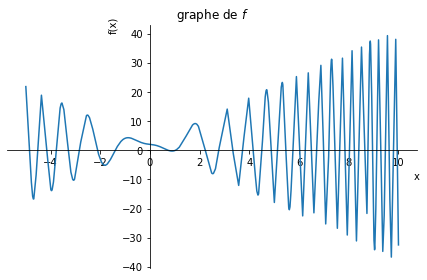

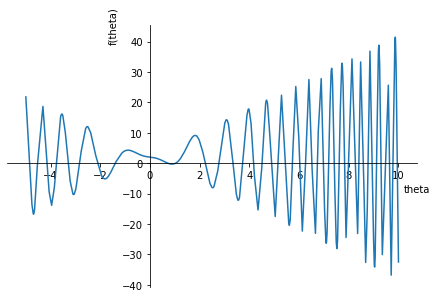

In [191]:
x = sy.symbols('x')
def f(s):
    return sy.exp(-s**2)*sy.sin(3*s)-4*s*sy.cos(s**2) +2

display(f(6*sy.pi))

sy.plot(f(x),(x,-5,10), title='graphe de $f$')
sy.plot(f(theta),(theta,-5,10)) # x est completement muet

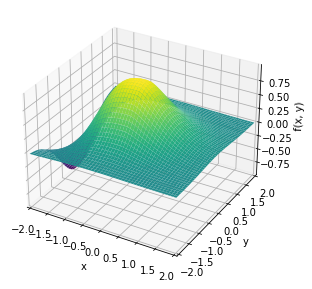

In [10]:
x,y=sy.symbols('x y')
sy.plotting.plot3d((sy.exp(-(x**1.5+y**2))),(x,-2,2),(y,-2,2))

On peut calculer la primitive d'une fonction (à une constante près). La variable x est ici la variable muette.

In [11]:
x = sy.symbols('x')
print(sy.integrate(x**2 + 7*x -2, x))
display(sy.integrate(x**2 + 7*x -2, x))

x**3/3 + 7*x**2/2 - 2*x


x**3/3 + 7*x**2/2 - 2*x

sympy.integrate peut calculer certaines intégrales (sympy.oo représente l'infini)

In [12]:
sy.integrate(4/(1+x**2),(x,0,sy.oo))

2*pi

In [13]:
sy.integrate(4/(1+x**2.3),(x,0,sy.oo))

5.58035766925896

In [81]:
y = sy.symbols('y')
expr=sy.exp(-x**2 - y**2)
sy.integrate(expr,(x,0,sy.oo),(y,0,sy.oo)) # double intégrale

exp

On peut calculer la dérivée d'une fonction, la variable x est ici la variable muette.

In [48]:
g=sy.diff(x**2 + 7*x -2, x)

display(g)
display(g.subs({x:6.3}))

2*x + 7

19.6000000000000

In [16]:
sy.diff(x**5 + 7*x -2, x,2) #ordre 2

20*x**3

Résolution de systèmes linéaires

In [82]:
import sympy as sp

x,y=sy.symbols('x,y')

#Système à deux équations :
e1= 2*x+  y+1
e2=-4*x-5*y+4

solution=sy.solve((e1,e2),x,y)

print(solution) # sous forme de dictionnaire si solution unique, liste sinon

print(solution[x],solution[y]) #si la solution est un dictionnaire

fghjkl <class 'sympy.core.add.Add'>
{x: -3/2, y: 2}
-3/2 2


In [18]:
x=sy.symbols('x')
solution=sp.solve(x**3-2*x**2+x+4)
for i in range(len(solution)):
    display(solution[i] )

-1

3/2 - sqrt(7)*I/2

3/2 + sqrt(7)*I/2

Resolution d'équations symboliques

In [19]:
x,y=sy.symbols('x,y')
display(sy.solve(x**2-y,x))
y=2
display(sy.solve(x**2-y,x))


[-sqrt(y), sqrt(y)]

[-sqrt(2), sqrt(2)]

Résolution d'EDO

In [20]:
import sympy
from sympy import Function,dsolve,Eq 
x=sympy.symbols('x') 
y=sympy.symbols('y', cls=Function) 
ode=Eq(sy.diff(y(x), x, 2) + 9*y(x),1) 
dsolve(ode, y(x)) #solution de y''+9y=1

Eq(y(x), C1*sin(3*x) + C2*cos(3*x) + 1/9)

### Calcul de limite

In [94]:
x=sympy.symbols('x') 
h= 1/x
display(sy.limit(h,x,0,dir="-")) # limite à gauche,
display(sy.limit(h,x,0,dir="+")) # limite à droite.
display(sy.limit(h,x,sy.oo))

-oo

oo

0

### Développement limité

In [204]:
f=sy.log(1+x) # la fonction de base
dlf=sy.series(f,x,0,5) # développement limité à l'ordre 5 en x=0
display(dlf)
u=dlf.subs({sy.O(x**5):0}) # troncature du reste
display(u)

x - x**2/2 + x**3/3 - x**4/4 + O(x**5)

-x**4/4 + x**3/3 - x**2/2 + x

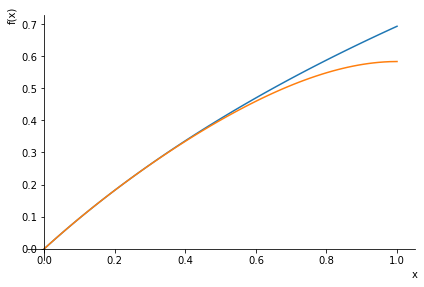

In [205]:
G1=sy.plot(f,(x,0,1),show=False)
G2=sy.plot(u,(x,0,1), show=False)
G1.extend(G2)
G1.show()

In [216]:
lam_f = sy.lambdify(x,f) # convertie en fonction 
print(type(f), " et ", type(lam_f))
v=np.linspace(0.1,5,100)
lam_f(v)

log  et  <class 'function'>


array([0.09531018, 0.13932267, 0.18147945, 0.22193069, 0.26080905,
       0.29823228, 0.33430539, 0.3691224 , 0.40276787, 0.43531807,
       0.46684207, 0.4974026 , 0.52705682, 0.55585693, 0.58385076,
       0.61108223, 0.63759176, 0.66341665, 0.68859136, 0.71314785,
       0.73711573, 0.76052258, 0.78339406, 0.8057541 , 0.82762509,
       0.84902796, 0.86998233, 0.89050661, 0.91061811, 0.93033309,
       0.94966689, 0.96863398, 0.987248  , 1.00552187, 1.02346778,
       1.04109731, 1.05842141, 1.07545049, 1.09219443, 1.10866262,
       1.124864  , 1.14080708, 1.15649995, 1.17195036, 1.18716569,
       1.20215297, 1.21691894, 1.23147005, 1.24581246, 1.25995207,
       1.27389454, 1.28764528, 1.3012095 , 1.3145922 , 1.32779815,
       1.34083199, 1.35369812, 1.36640082, 1.37894418, 1.39133216,
       1.40356854, 1.41565701, 1.42760109, 1.43940419, 1.4510696 ,
       1.46260049, 1.47399994, 1.48527091, 1.49641625, 1.50743874,
       1.51834107, 1.52912581, 1.53979548, 1.55035251, 1.56079